Truth Table for Half Adder:
A    B    |   Sum (S)   Carry (C)
0    0    |   0         0
0    1    |   1         0
1    0    |   1         0
1    1    |   0         1

Truth Table for Half subtracter:
A B | Diff Borrow
------------------
0 0 |  0    0
0 1 |  1    1
1 0 |  1    0
1 1 |  0    0

In [1]:
def half_subtracter(a, b):
    diff = a ^ b  # Difference output
    borrow = (not a) & b  # Borrow output
    return diff, borrow

# Generate the truth table
print("A B | Diff Borrow")
print("------------------")
for a in [0, 1]:
    for b in [0, 1]:
        d, br = half_subtracter(a, b)
        print(f"{a} {b} |  {d}    {br}")
        

A B | Diff Borrow
------------------
0 0 |  0    0
0 1 |  1    1
1 0 |  1    0
1 1 |  0    0


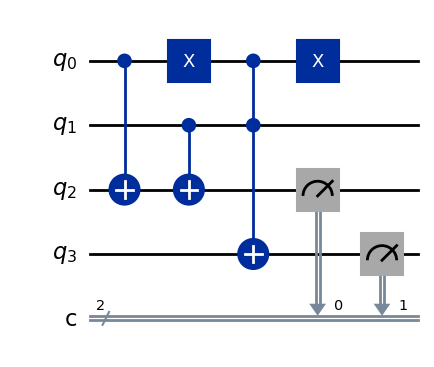

In [9]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 4 qubits (A, B, Difference, Borrow)
qc = QuantumCircuit(4, 2)

# Compute DIFFERENCE = A ⊕ B using two CNOT (CX) gates
qc.cx(0, 2)  # A → Difference
qc.cx(1, 2)  # B → Difference (A ⊕ B)

# Compute BORROW = ¬A ⋅ B using NOT and Toffoli gate
qc.x(0)       # Apply NOT to A (¬A)
qc.ccx(0, 1, 3)  # (¬A, B) → Borrow (stored in qubit 3)
qc.x(0)       # Revert A back to original state (optional, for reversibility)

# Measure DIFFERENCE and BORROW
qc.measure(2, 0)  # Measure Difference
qc.measure(3, 1)  # Measure Borrow

# Draw the circuit
qc.draw('mpl')


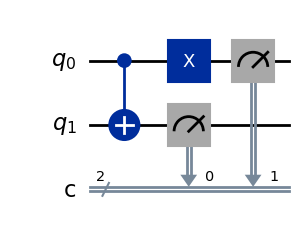

In [10]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 2 qubits (A, B) and 2 classical bits for measurement
qc = QuantumCircuit(2, 2)

# Compute DIFFERENCE = A ⊕ B using CNOT (CX) gate
qc.cx(0, 1)  # A → Difference (overwrites B)

# Compute BORROW = ¬A ⋅ B using NOT and AND-like behavior
qc.x(0)       # Apply NOT to A (¬A)
qc.measure(1, 0)  # Measure Difference (B stores the difference)
qc.measure(0, 1)  # Measure Borrow (¬A stored in classical bit 1)

# Draw the circuit
qc.draw('mpl')